In [34]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [35]:
# Relative path from notebooks/data_load.ipynb to data/raw/FW_Veg_Rem_Combined.csv
df = pd.read_csv('../data/raw/FW_Veg_Rem_Combined.csv')

# Check it loaded correctly
df.head()


,Unnamed: 0.1,Unnamed: 0,fire_name,fire_size,fire_size_class,stat_cause_descr,latitude,longitude,state,disc_clean_date,...,Wind_cont,Hum_pre_30,Hum_pre_15,Hum_pre_7,Hum_cont,Prec_pre_30,Prec_pre_15,Prec_pre_7,Prec_cont,remoteness
0,0,0,NaN,10.0,C,Missing/Undefined,18.105072,-66.753044,PR,2/11/2007,...,3.250413,78.216590,76.793750,76.381579,78.724370,0.0,0.0,0.0,0.0,0.017923
1,1,1,NaN,3.0,B,Arson,35.038330,-87.610000,TN,12/11/2006,...,2.122320,70.840000,65.858911,55.505882,81.682678,59.8,8.4,0.0,86.8,0.184355
2,2,2,NaN,60.0,C,Arson,34.947800,-88.722500,MS,2/29/2004,...,3.369050,75.531629,75.868613,76.812834,65.063800,168.8,42.2,18.1,124.5,0.194544
3,3,3,WNA 1,1.0,B,Debris Burning,39.641400,-119.308300,NV,6/6/2005,...,0.000000,44.778429,37.140811,35.353846,0.000000,10.4,7.2,0.0,0.0,0.487447
4,4,4,NaN,2.0,B,Miscellaneous,30.700600,-90.591400,LA,9/22/1999,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.0,-1.0,-1.0,-1.0,0.214633


In [38]:
vars_to_keep = [
    "fire_size",
    "fire_size_class",
    "latitude",
    "longitude",
    "discovery_month",
    "disc_pre_year",
    "Vegetation",
    "Temp_pre_30",
    "Temp_pre_15",
    "Temp_pre_7",
    "Wind_pre_30",
    "Wind_pre_15",
    "Wind_pre_7",
    "Hum_pre_30",
    "Hum_pre_15",
    "Hum_pre_7",
    "Prec_pre_30",
    "Prec_pre_15",
    "Prec_pre_7",
    "remoteness"
    ]
# Select only the columns we want to keep
df = df[vars_to_keep]
# Check the columns we kept
df.head()

,fire_size,fire_size_class,latitude,longitude,discovery_month,disc_pre_year,Vegetation,Temp_pre_30,Temp_pre_15,Temp_pre_7,Wind_pre_30,Wind_pre_15,Wind_pre_7,Hum_pre_30,Hum_pre_15,Hum_pre_7,Prec_pre_30,Prec_pre_15,Prec_pre_7,remoteness
0,10.0,C,18.105072,-66.753044,Feb,2007,12,24.480974,24.716923,24.902597,4.341807,3.492857,3.262092,78.216590,76.793750,76.381579,0.0,0.0,0.0,0.017923
1,3.0,B,35.038330,-87.610000,Dec,2006,15,7.553433,7.010000,0.343529,2.709764,2.881707,1.976471,70.840000,65.858911,55.505882,59.8,8.4,0.0,0.184355
2,60.0,C,34.947800,-88.722500,Feb,2004,16,4.971930,5.782766,5.558750,3.364499,2.923830,2.695833,75.531629,75.868613,76.812834,168.8,42.2,18.1,0.194544
3,1.0,B,39.641400,-119.308300,Jun,2005,0,16.275967,18.996181,18.142564,4.054982,3.398329,3.671282,44.778429,37.140811,35.353846,10.4,7.2,0.0,0.487447
4,2.0,B,30.700600,-90.591400,Sep,1999,12,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.0,-1.0,-1.0,0.214633


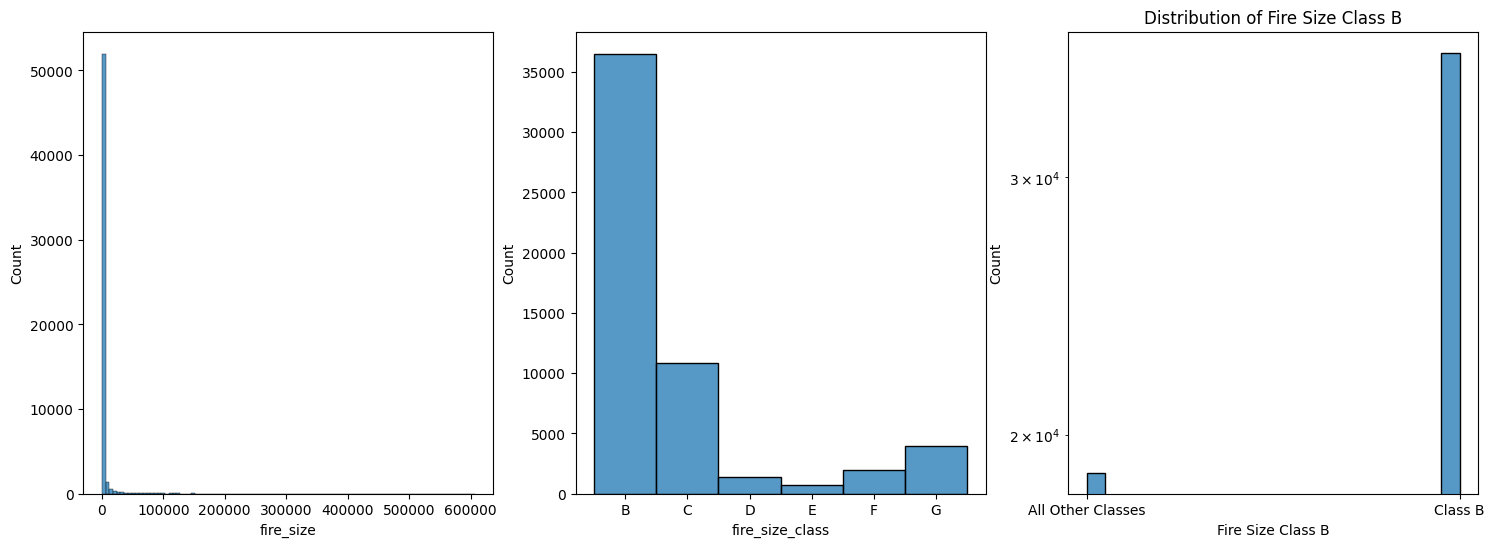

In [37]:
# Compare distribution of fire size classes with distribution of fire sizes
# order fire size classes variable alphabetically
df.fire_size_class = pd.Categorical(df.fire_size_class, ordered=True)

# Three plots next to each other
fig, axes = plt.subplots(1, 3, figsize=(18, 6))


# Plot the distribution of fire sizes
sns.histplot(df.fire_size, bins=100, ax=axes[0])
plt.yscale('log')
plt.xlabel('Fire Size (ha)')
plt.ylabel('Count')
plt.title('Distribution of Fire Sizes')

# Plot the distribution of fire size classes
sns.histplot(df.fire_size_class, bins=100, ax=axes[1])
plt.xlabel('Fire Size Class')
plt.ylabel('Count')
plt.title('Distribution of Fire Size Classes')

# Plot the distribution of fire size classes B and all others taken together
# Create binary fire_size_class variable
df['fire_size_class_B'] = df.fire_size_class.apply(lambda x: 1 if x == 'B' else 0)

# Show only 0 and 1 on the x-axis and switch 0 and 1 so 1 is on the left
sns.histplot(df.fire_size_class_B, ax=axes[2])
plt.xticks([0, 1], ['All Other Classes', 'Class B'])
plt.xlabel('Fire Size Class B')
plt.ylabel('Count')
plt.title('Distribution of Fire Size Class B')
plt.show()


<Axes: xlabel='fire_size_class_B'>

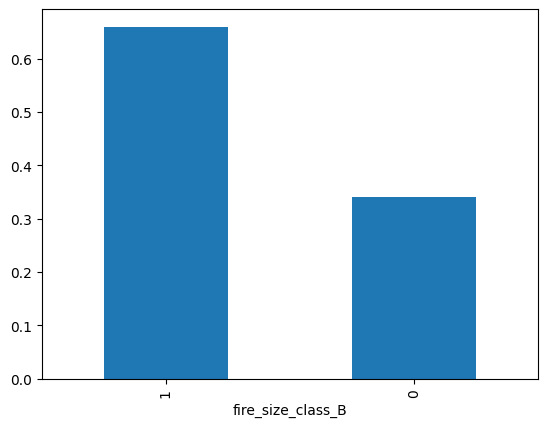

In [32]:
df.fire_size_class_B.value_counts(normalize=True).plot(kind='bar')

In [33]:
# Check for missing values
df.isnull().sum()

fire_size            0
fire_size_class      0
latitude             0
Vegetation           0
Temp_pre_30          0
Temp_pre_15          0
Temp_pre_7           0
Temp_cont            0
Wind_pre_30          0
Wind_pre_15          0
Wind_pre_7           0
Wind_cont            0
Hum_pre_30           0
Hum_pre_15           0
Hum_pre_7            0
Hum_cont             0
Prec_pre_30          0
Prec_pre_15          0
Prec_pre_7           0
Prec_cont            0
remoteness           0
fire_size_class_B    0
dtype: int64